#Effect of Saving propensity on inequality in CC model

#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(0)

#Modelling A. Chakraborti and B.K. Chakrabarti (CC) model 

In [2]:
def cc_model(saving_propensity, number_of_trades):
  number_of_agents = 200
  initial_money_per_agent = 1
  wealth_of_agents = [initial_money_per_agent]*number_of_agents

  for trade in range(number_of_trades):
    #Return a k length list of unique elements chosen from the population sequence or set. 
    #Used for random sampling without replacement.
    agent_1, agent_2 = random.sample(range(number_of_agents),2) 
    epsilon = random.random() #[0,1)

    wealth_of_agents[agent_1], wealth_of_agents[agent_2] = ( ( saving_propensity*wealth_of_agents[agent_1] + epsilon*(1-saving_propensity)*(wealth_of_agents[agent_1] + wealth_of_agents[agent_2]) ),
                                                            ( saving_propensity*wealth_of_agents[agent_2] + (1-epsilon)*(1-saving_propensity)*(wealth_of_agents[agent_1] + wealth_of_agents[agent_2]) ) )
  return wealth_of_agents


#Calculating Gini coefficient

In [3]:
def get_gini_coefficient(wealth_of_agents):
  diffsum = 0
  for i, xi in enumerate(wealth_of_agents[:-1], 1):
    diffsum += np.sum(np.abs(xi - wealth_of_agents[i:]))
  return diffsum / (len(wealth_of_agents)**2 * np.mean(wealth_of_agents))

#Creating data points

In [4]:
def create_data_points(nuber_of_saving_propensities, number_of_trades):
  x = []
  y = []

  for saving_propensity in np.linspace(0,1,nuber_of_saving_propensities):
    x.append(saving_propensity)
    wealth_of_agents_after_trades = np.array(cc_model(saving_propensity, number_of_trades))
    y.append(get_gini_coefficient(wealth_of_agents_after_trades))
  return x,y

In [14]:
nuber_of_saving_propensities = 30
number_of_trades = 10**4
x,y = create_data_points(nuber_of_saving_propensities, number_of_trades)

#Scatter Plot

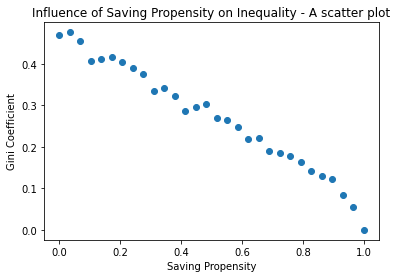

In [16]:
plt.scatter(x,y)
plt.xlabel("Saving Propensity")
plt.ylabel("Gini Coefficient")
plt.title("Influence of Saving Propensity on Inequality - A scatter plot")
plt.show()

#Hypothesis

Inequality, hence the Gini coefficient decreases as saving propensity increases.

#Testing Hypothesis using Linear Regression

Slope(m) of linear regression line =  -0.4221556477215364 



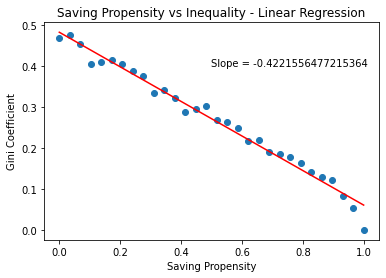

In [27]:
#obtain m (slope) and c(intercept) of linear regression line
m, c = np.polyfit(x, y, 1)

print('Slope(m) of linear regression line = ', m, '\n')

#use red as color for regression line
plt.plot(x, m*np.array(x)+c, color='red')

plt.scatter(x,y)
plt.xlabel("Saving Propensity")
plt.ylabel("Gini Coefficient")
plt.title(f'Saving Propensity vs Inequality - Linear Regression')

plt.text(0.5,0.4,f'Slope = {m}')

plt.show()

#Testing hypothesis using Correlation Coefficient

In [28]:
correlation_matrix = np.corrcoef(x,y)
print(correlation_matrix)
print('Correlation Coefficient = ', correlation_matrix[0,1])

[[ 1.         -0.99076783]
 [-0.99076783  1.        ]]
Correlation Coefficient =  -0.9907678288236917
